In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Set default figure size
plt.rcParams['figure.figsize'] = [10, 6]  # Width = 10 inches, Height = 6 inches

In [4]:
df = pd.read_excel('EV_Dataset_India.xlsx')

In [6]:
df.head()

,Year,Month_Name,Date,State,Vehicle_class,Vehicle_category,Vehicle_type,Sales Quantity
0,2014,jan,2014-01-01,Andhra Pradesh,Agricultural tractor,Others,Agriculture,0
1,2014,jan,2014-01-01,Andhra Pradesh,Ambulance,Others,Health Sector,0
2,2014,jan,2014-01-01,Andhra Pradesh,Bus,Bus,Public Transport,0
3,2014,jan,2014-01-01,Andhra Pradesh,Goods Carrier,Others,Transport,0
4,2014,jan,2014-01-01,Andhra Pradesh,Scooter,2-Wheelers,Personal,1


In [8]:
df.shape

(24651, 8)

In [10]:
df.info

<bound method DataFrame.info of        Year Month_Name       Date                     State  \
0      2014        jan 2014-01-01            Andhra Pradesh   
1      2014        jan 2014-01-01            Andhra Pradesh   
2      2014        jan 2014-01-01            Andhra Pradesh   
3      2014        jan 2014-01-01            Andhra Pradesh   
4      2014        jan 2014-01-01            Andhra Pradesh   
...     ...        ...        ...                       ...   
24646  2023        dec 2023-01-12                       Goa   
24647  2023        dec 2023-01-12                       Goa   
24648  2023        dec 2023-01-12  Andaman & Nicobar Island   
24649  2023        dec 2023-01-12  Andaman & Nicobar Island   
24650  2023        dec 2023-01-12  Andaman & Nicobar Island   

              Vehicle_class Vehicle_category      Vehicle_type  Sales Quantity  
0      Agricultural tractor           Others       Agriculture               0  
1                 Ambulance           Others     

In [12]:
df.Year.value_counts()

2022    2564
2023    2542
2019    2520
2018    2488
2021    2478
2017    2454
2016    2427
2015    2344
2020    2311
2014    2310
2024     213
Name: Year, dtype: int64

In [14]:
df.State.value_counts()

Maharashtra                 835
Rajasthan                   828
Madhya Pradesh              828
Uttar Pradesh               825
Haryana                     825
West Bengal                 821
Punjab                      821
Uttarakhand                 817
Chhattisgarh                815
Odisha                      810
Gujarat                     807
Karnataka                   800
Bihar                       792
Andhra Pradesh              783
Assam                       783
Kerala                      781
Delhi                       762
Tamil Nadu                  759
Himachal Pradesh            747
Jammu and Kashmir           742
Jharkhand                   720
Chandigarh                  704
Manipur                     673
Goa                         672
Puducherry                  651
DNH and DD                  642
Arunachal Pradesh           638
Nagaland                    626
Tripura                     624
Meghalaya                   618
Ladakh                      561
Mizoram 

In [16]:
df.Vehicle_class.value_counts()

Car                     4111
Scooter                 4101
Goods Carrier           4096
Bus                     3813
Ambulance               3393
Agricultural tractor    3186
E-Rickshaw              1951
Name: Vehicle_class, dtype: int64

In [18]:
df.Vehicle_type.value_counts()

Personal            8212
Public Transport    5764
Transport           4096
Health Sector       3393
Agriculture         3186
Name: Vehicle_type, dtype: int64

In [22]:
df['Sales Quantity'].describe()

count    24651.000000
mean       131.820737
std        845.401325
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max      20584.000000
Name: Sales Quantity, dtype: float64

In [26]:
df.dtypes

Year                         int64
Month_Name                  object
Date                datetime64[ns]
State                       object
Vehicle_class               object
Vehicle_category            object
Vehicle_type                object
Sales Quantity               int64
dtype: object

In [28]:
categorical_columns = ['Month_Name', 'State', 'Vehicle_class', 'Vehicle_category', 'Vehicle_type']
df[categorical_columns] = df[categorical_columns].astype('category')

In [30]:
df.dtypes

Year                         int64
Month_Name                category
Date                datetime64[ns]
State                     category
Vehicle_class             category
Vehicle_category          category
Vehicle_type              category
Sales Quantity               int64
dtype: object

Data Cleaning

In [33]:
df.duplicated().sum()

0

In [35]:
df.isnull().sum()  

Year                0
Month_Name          0
Date                0
State               0
Vehicle_class       0
Vehicle_category    0
Vehicle_type        0
Sales Quantity      0
dtype: int64

In [37]:
df.info()    #Checking Everything is well organised

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24651 entries, 0 to 24650
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Year              24651 non-null  int64         
 1   Month_Name        24651 non-null  category      
 2   Date              24651 non-null  datetime64[ns]
 3   State             24651 non-null  category      
 4   Vehicle_class     24651 non-null  category      
 5   Vehicle_category  24651 non-null  category      
 6   Vehicle_type      24651 non-null  category      
 7   Sales Quantity    24651 non-null  int64         
dtypes: category(5), datetime64[ns](1), int64(2)
memory usage: 700.7 KB


Data Visualisation

Text(0, 0.5, 'EV Sales')

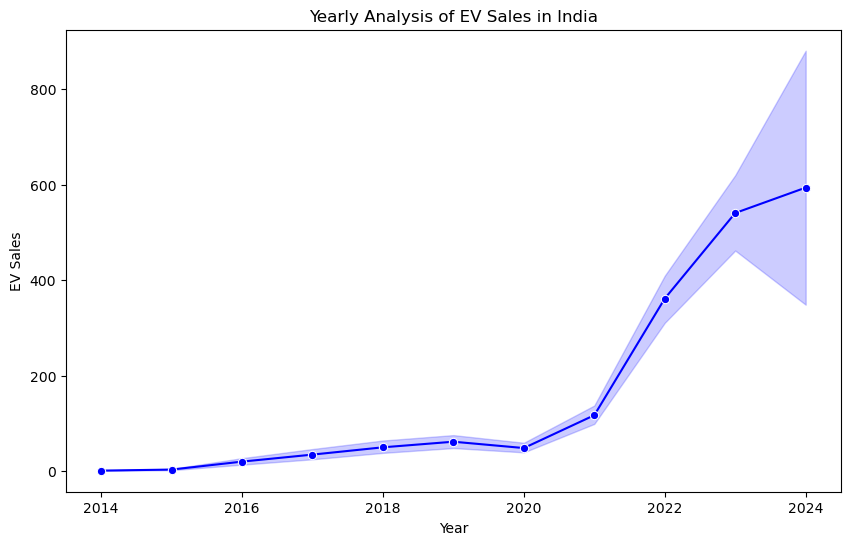

In [42]:
plt.title('Yearly Analysis of EV Sales in India')
sns.lineplot(x='Year', y='Sales Quantity', data=df, marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('EV Sales')

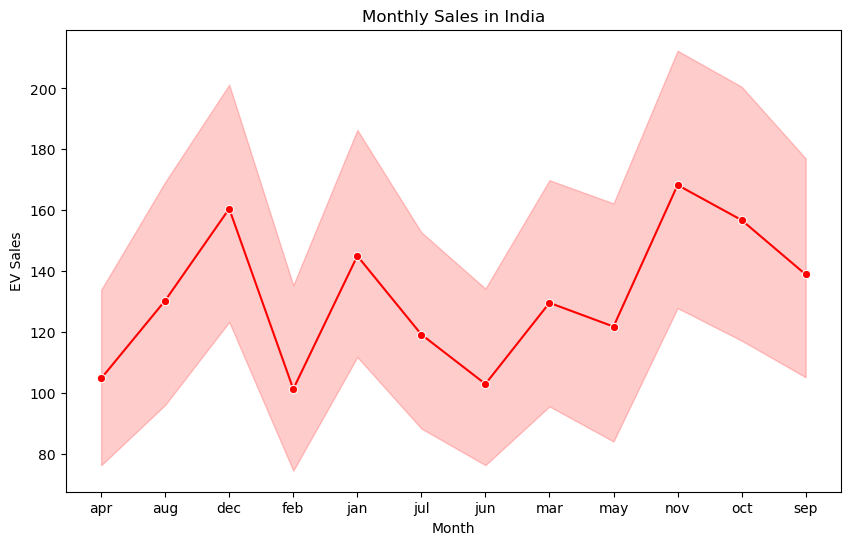

In [44]:
plt.title('Monthly Sales in India')
sns.lineplot(x='Month_Name', y='Sales Quantity', data=df, marker='o', color='r')
plt.xlabel('Month')
plt.ylabel('EV Sales');

Text(0, 0.5, 'Sales')

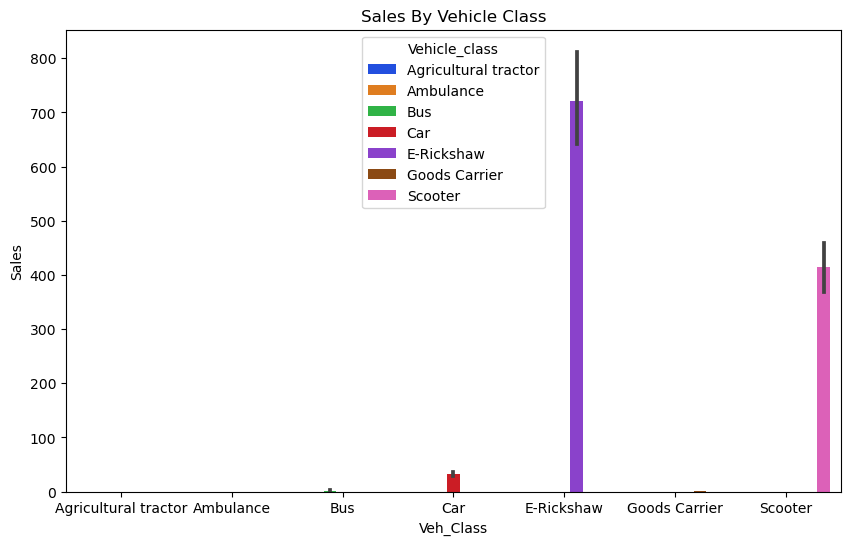

In [50]:
plt.title('Sales By Vehicle Class')
sns.barplot(x='Vehicle_class', y='Sales Quantity', data=df, hue='Vehicle_class', palette='bright')
plt.xlabel('Veh_Class')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

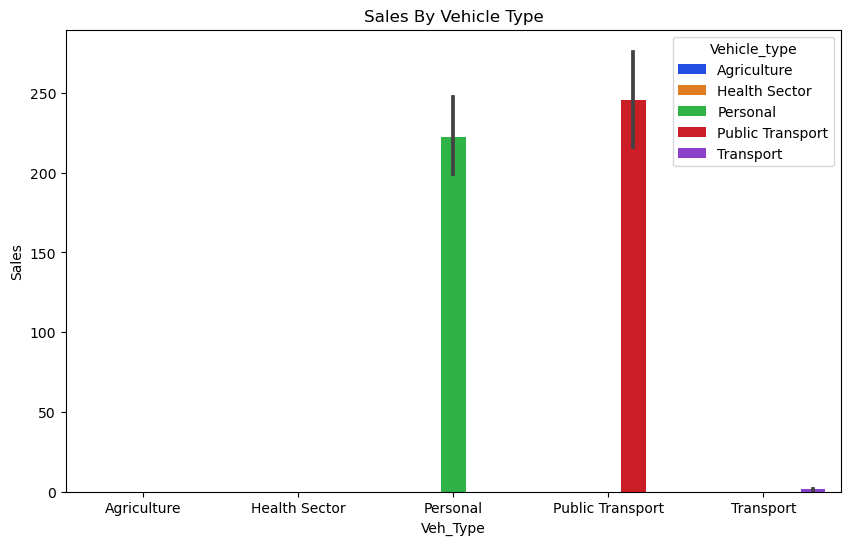

In [54]:
plt.title('Sales By Vehicle Type')
sns.barplot(x='Vehicle_type', y='Sales Quantity', data=df, hue='Vehicle_type', palette='bright')
plt.xlabel('Veh_Type')
plt.ylabel('Sales')

Text(0.5, 0, 'Sales')

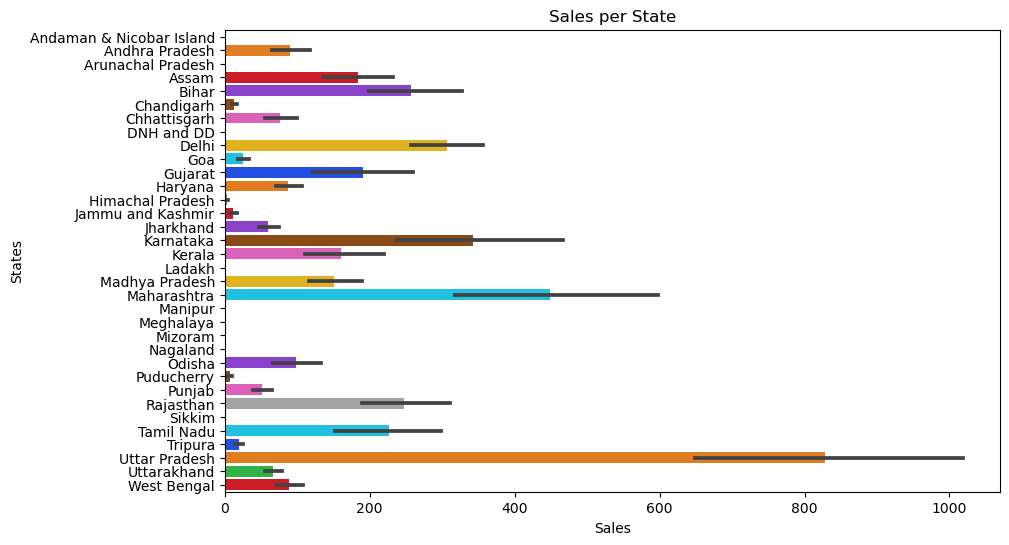

In [63]:
plt.title('Sales per State')
sns.barplot(y='State', x='Sales Quantity', data=df, palette='bright')
plt.ylabel('States')
plt.xlabel('Sales')

In [73]:
top_5_states = df.groupby('State')['Sales Quantity'].sum().nlargest(5).index

In [75]:
top_5_df = df[df['State'].isin(top_5_states)]

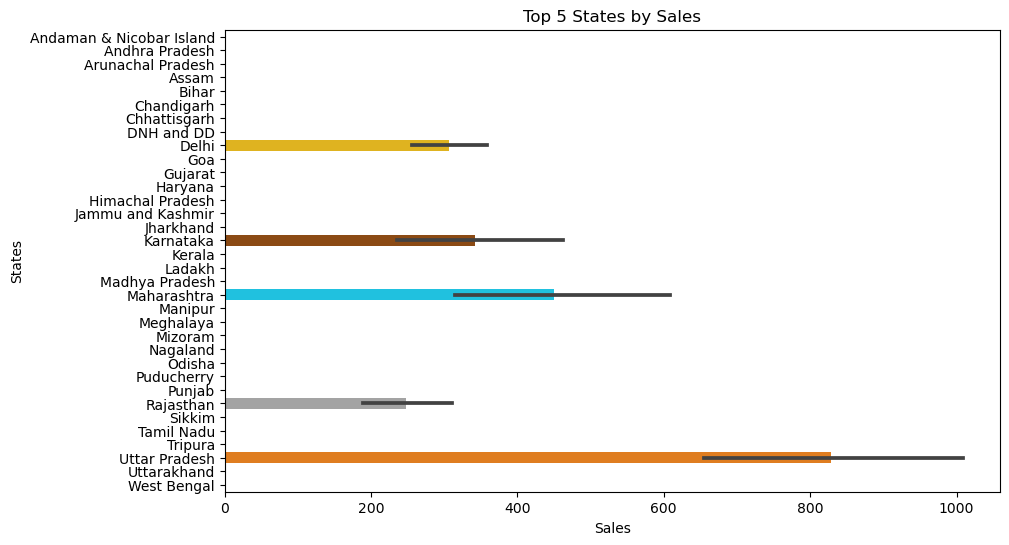

In [77]:
plt.title('Top 5 States by Sales')
sns.barplot(y='State', x='Sales Quantity', data=top_5_df, palette='bright')
plt.ylabel('States')
plt.xlabel('Sales')

plt.show()